In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [12]:
label1 = np.load("data_evolution/labels2_G5P.npy", allow_pickle =True)

label1[:,1] = label1[:,1]+label1[:,0] 
print(label1.shape)


(2220, 7)


In [13]:
time = np.ones([60,37])
time2 = np.ones([60])
for i in range(60):
    time2[i] = i*10.2
    for j in range(37):
        time[i,j] = (j*0.04) + (10.2*i)

time=np.reshape(time, [2220])

In [14]:
#calculation of averages
average = np.ones([60,2,7])

sum=0
print(label1.shape)
batch = 37

for k in range(7):
    data = label1[:,k]
    for i in range(60):
        #print(data[(i*batch):(batch*(i+1))])
        aver = np.average(data[(i*batch):(batch*(i+1))])
        values = data[(i*batch):(batch*(i+1))]
        average[i,0,k] = aver
        sum=0
        for j in range(batch):
            av = np.absolute(values[j] - aver)
            sum = sum+av
        average[i,1,k] = sum/batch

#np.save('GR5P_error.npy', average)

(2220, 7)


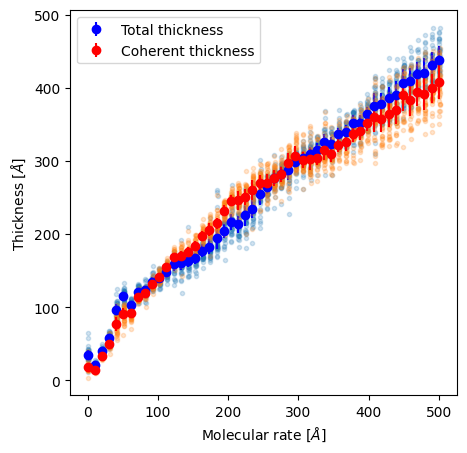

In [15]:
monolayer_thick = 20.8
growth_rate = 1 #A/s

#total thickness
total_thick = label1[:1850,4]*monolayer_thick

#total roughness
total_rough = (label1[:1850,3])*monolayer_thick

#coherent thickness
c_thick = label1[:1850,6]*monolayer_thick

#total roughness
c_rough1 = (label1[:1850,5])*monolayer_thick

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.plot(time[:1850]*growth_rate, total_thick, '.', alpha = 0.2)
plt.errorbar(time2[:50]*growth_rate, average[:50,0,4]*monolayer_thick, yerr=average[:50,1,4]*monolayer_thick, fmt="bo", label = 'Total thickness')
plt.plot(time[:1850]*growth_rate, c_thick, '.', alpha = 0.2)
plt.errorbar(time2[:50]*growth_rate, average[:50,0,6]*20.8, yerr=average[:50,1,6]*20.8, fmt="ro", label = 'Coherent thickness')
plt.xlabel("Molecular rate [$\\AA$]")
plt.ylabel("Thickness [$\\AA$]")
plt.legend()
plt.show()



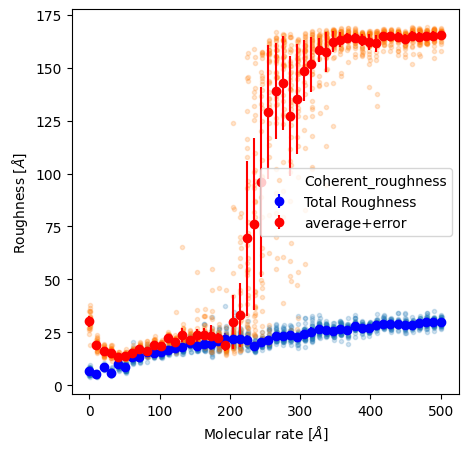

(5, 1850)


In [16]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.plot(time[:1850]*growth_rate, total_rough, '.', alpha = 0.2)
plt.errorbar(time2[:50], average[:50,0,3]*monolayer_thick, yerr=average[:50,1,3]*monolayer_thick, fmt="bo", label = 'Total Roughness')
plt.plot(time[:1850]*growth_rate, c_rough1, '.', alpha = 0.2, label = 'Coherent_roughness')
plt.errorbar(time2[:50], average[:50,0,5]*monolayer_thick, yerr=average[:50,1,5]*monolayer_thick, fmt="ro", label = 'average+error')
plt.xlabel("Molecular rate [$\\AA$]")
plt.ylabel("Roughness [$\\AA$]")
plt.legend()
plt.show()


gr5 = np.array([total_thick, total_rough, c_thick, c_rough1, time[:1850]*growth_rate])
print(gr5.shape)

gr5_time = time2*growth_rate
#np.save('GR5P_time.npy', gr5_time)
#np.save('GR5P.npy', gr5)

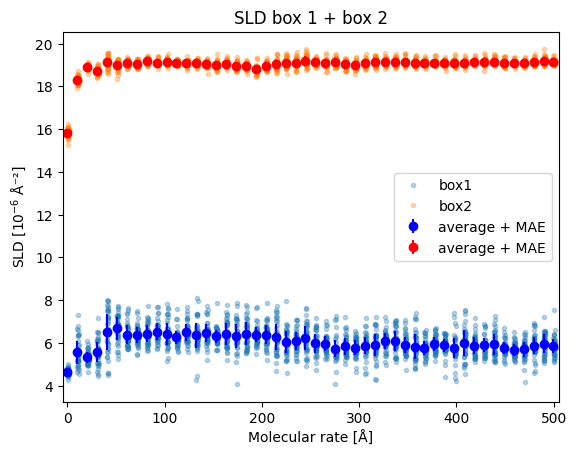

In [17]:
plt.plot(time*growth_rate, label1[:,0], '.', alpha= 0.3, label = 'box1')
plt.errorbar(time2*growth_rate, average[:,0,0], yerr=average[:,1,0], fmt="bo", label = 'average + MAE')
plt.plot(time*growth_rate, label1[:,1], '.', alpha= 0.3, label = 'box2')
plt.errorbar(time2*growth_rate, average[:,0,1], yerr=average[:,1,1], fmt="ro", label = 'average + MAE')
plt.title('SLD box 1 + box 2')
plt.xlabel("Molecular rate [Å]")
plt.ylabel("SLD [$10^{-6}$ Å⁻²]")
plt.xlim([-5,505])
plt.legend()
plt.show()

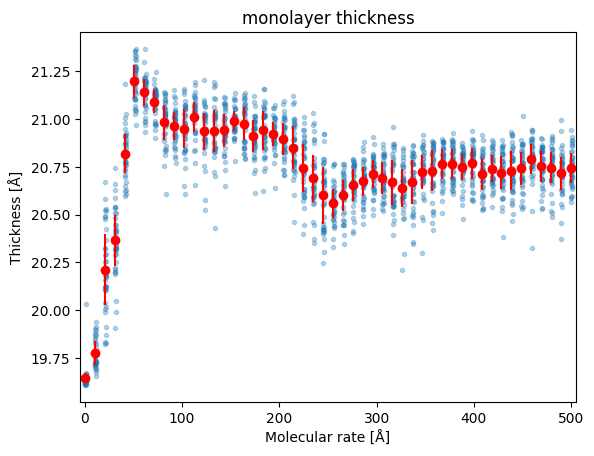

In [18]:
plt.plot(time*growth_rate, label1[:,2]+0.1, '.', alpha= 0.3, label = 'data')
plt.errorbar(time2*growth_rate, average[:,0,2]+0.1, yerr=average[:,1,2], fmt="ro", label = 'average + MAE')
plt.title('monolayer thickness')
plt.xlabel("Molecular rate [Å]")
plt.ylabel("Thickness [Å]")
plt.xlim([-5,505])
#plt.legend()
plt.show()

Exponent beta: [0.61177395]


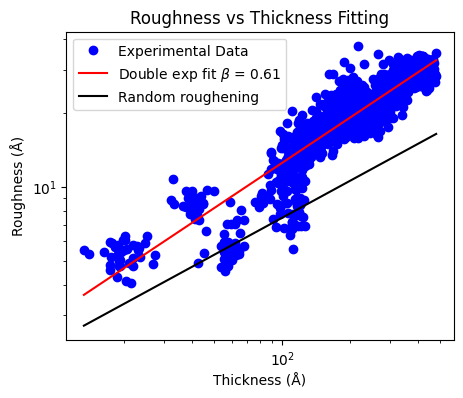

In [19]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sample data: thickness (L), roughness (w), and growth rate (R)
#thickness = average[:,0,4]*20.8  # Example thickness values
thickness = total_thick[38:1850]
ones = np.ones(8)     # Example growth rate values
#roughness = average_r[:,0,3]  # Example roughness values
roughness = total_rough[38:1850]

growth_speed = growth_rate*ones

# Define the power-law function to fit
def power_law(thickness, beta):
    growth_rate = 1
    gamma = 0.209
    A = 0.749
    return A * growth_rate**gamma * thickness**beta

# Perform the curve fitting
popt, pcov = curve_fit(power_law, thickness, roughness)

beta = popt
print('Exponent beta:', beta)

# Generate data for plotting the fitted curve
thickness_fit = np.linspace(min(thickness), max(thickness), 100)
roughness_fit = power_law(thickness_fit, beta)

growth_rate = 1
gamma = 0.209
rran_fit = 0.749 * growth_rate**gamma * thickness_fit**0.5

# Plot the data and the fitted curve
plt.figure(figsize=(5, 4), dpi=100)
plt.plot(thickness, roughness, 'bo', label='Experimental Data')
plt.plot(thickness_fit, roughness_fit, 'r-', label='Double exp fit $\\beta$ = 0.61')
plt.plot(thickness_fit, rran_fit, 'black', label='Random roughening')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Thickness (Å)')
plt.ylabel('Roughness (Å)')
plt.title('Roughness vs Thickness Fitting')
plt.legend()
#plt.grid(True)
plt.show()

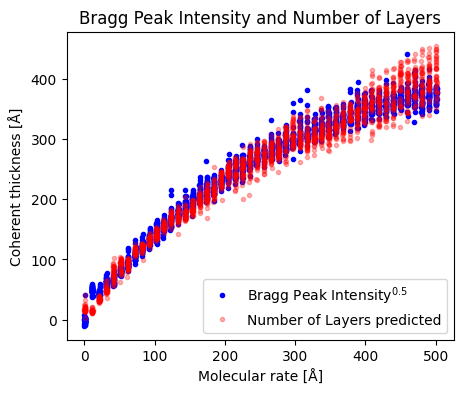

In [20]:
bragg = np.loadtxt('bragg_intensities.txt')

# Sample data: Replace with your actual data
time_growth_rate = time[:1850]*growth_rate
bragg_intensity = bragg[:1850]**0.5  # Bragg Intensity
number_of_layers = c_thick/20.8  # Coherent Thickness

bragg_t = np.array([time_growth_rate, bragg[:1850]])
#np.save('bragg_t5.npy', bragg_t)

# Calculate the scale factor and offset
scale_factor = (np.max(number_of_layers) - np.min(number_of_layers)) / (np.max(bragg_intensity) - np.min(bragg_intensity))
offset = np.mean(number_of_layers) - np.mean(bragg_intensity) * scale_factor

# Adjust the bragg intensity
bragg_adjusted = bragg_intensity * scale_factor + offset

# Plotting
plt.figure(figsize=(5, 4), dpi=100)

# Plot Bragg peak intensity (adjusted)
plt.plot(time_growth_rate, bragg_adjusted*20.8, 'b.', label='Bragg Peak Intensity$^{0.5}$')

# Plot number of layers (unadjusted)
plt.plot(time_growth_rate, number_of_layers*20.8, 'r.', alpha = 0.3, label='Number of Layers predicted')

# Add labels and legend
plt.xlabel("Molecular rate [Å]")
plt.ylabel("Coherent thickness [Å]")
plt.title('Bragg Peak Intensity and Number of Layers')
plt.legend()
plt.show()